In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Corona_NLP_train.csv", parse_dates=["TweetAt"],encoding="latin1")
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
UserName         41157 non-null int64
ScreenName       41157 non-null int64
Location         32567 non-null object
TweetAt          41157 non-null datetime64[ns]
OriginalTweet    41157 non-null object
Sentiment        41157 non-null object
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [6]:
df.Sentiment=df.Sentiment.replace({'Extremely Positive':'Positive',\
                                       'Extremely Negative':'Negative'})
# df.head()
df.Sentiment.value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

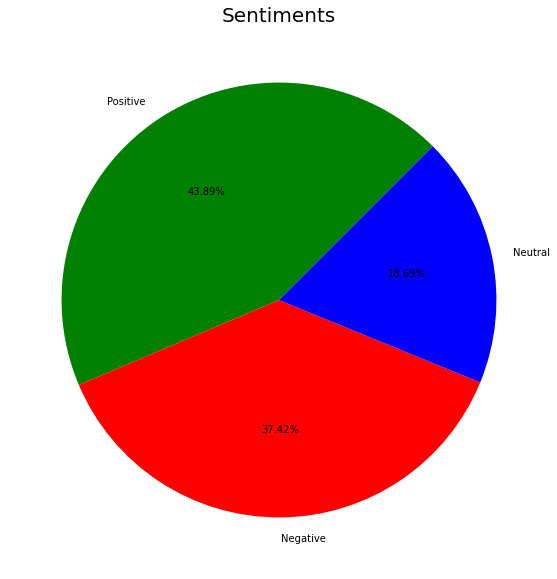

In [25]:
from sklearn.model_selection import train_test_split

train_text,val_text,train_label,val_label=train_test_split(df.OriginalTweet,df.Sentiment,\
                                                           test_size=0.15,random_state=42)

plt.figure(figsize=(15,10))
plt.pie(train_label.value_counts(),\
        colors=['green','red','blue'],
        labels=['Positive','Negative','Neutral'],\
        autopct='%0.2f%%',radius=1,startangle=45)
plt.title('Sentiments',fontdict={'size':'20'})
plt.show()

/home/drex/.local/lib/python3.6/site-packages/pandas/plotting/_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


[]

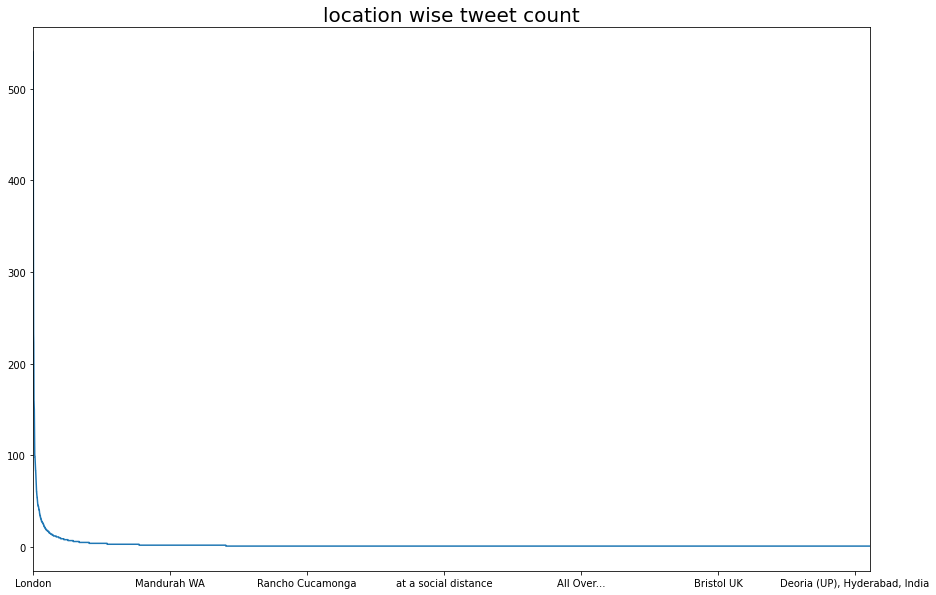

In [23]:
df_loc = df.Location.value_counts()
plt.figure(figsize=(15,10))
df_loc.plot()
plt.title('location wise tweet count',\
          fontdict={'size':'20'})
plt.plot()

[]

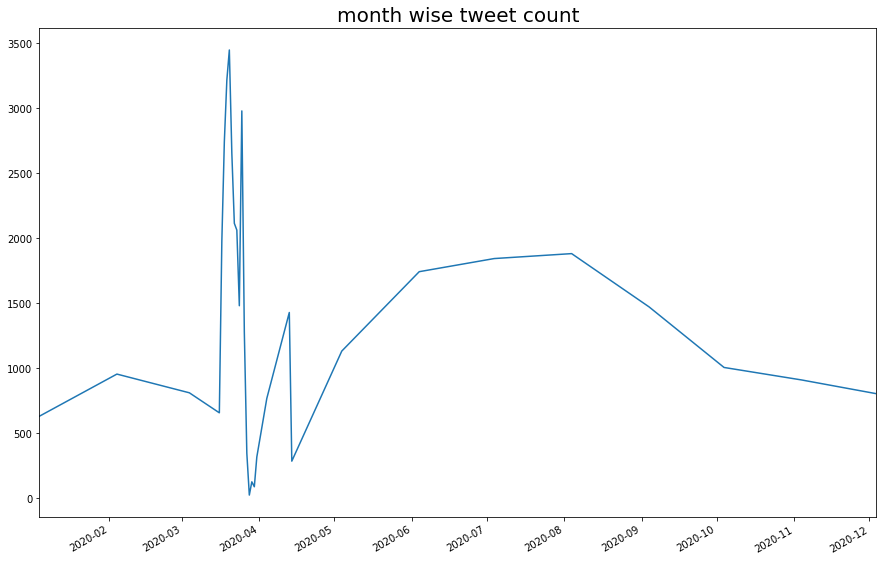

In [32]:
df_loc = df.TweetAt.value_counts()
plt.figure(figsize=(15,10))
df_loc.plot()
plt.title('month wise tweet count',\
          fontdict={'size':'20'})
plt.plot()

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# train_text,val_text,train_label,val_label=train_test_split(df.OriginalTweet,df.Sentiment,\
#                                                            test_size=0.15,random_state=42)
tf_idf = TfidfVectorizer(ngram_range=(1, 2), max_features=50000, min_df=3)
logit = LogisticRegression(C=1, n_jobs=4, solver='lbfgs', random_state=17, verbose=1)
tfidf_logit_pipeline = Pipeline([('tf_idf', tf_idf), ('logit', logit)])


In [42]:
%%time
tfidf_logit_pipeline.fit(train_text, train_label)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   56.2s finished


CPU times: user 11.2 s, sys: 342 ms, total: 11.6 s
Wall time: 1min 8s


Pipeline(steps=[('tf_idf',
                 TfidfVectorizer(max_features=50000, min_df=3,
                                 ngram_range=(1, 2))),
                ('logit',
                 LogisticRegression(C=1, n_jobs=4, random_state=17,
                                    verbose=1))])

In [44]:
%%time
pred = tfidf_logit_pipeline.predict(val_text)


CPU times: user 1.11 s, sys: 7.02 ms, total: 1.12 s
Wall time: 1.15 s


In [46]:
accuracy_score(val_label, pred)

0.775348234531908